In [1]:
import h5py
import numpy as np

from sourcesep.sim import SimData
from sourcesep.utils.config import load_config

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(font_scale=0.8)
%config InlineBackend.figure_format='retina'


paths = load_config(dataset_key='all')
f = h5py.File(paths['root'] / 'sims' / '2023-03-08.h5', 'r')
for key in f.keys():
    print(key, f[key].shape)

Paths are for dataset tagged: all
A (216000, 3)
B (5, 60)
E (5, 60)
H_dox (216000,)
H_ox (216000,)
L_arr (60,)
M (216000,)
Mu_dox (60,)
Mu_ox (60,)
N (216000, 5)
O (216000, 5, 60)
S (3, 60)
T_arr (216000,)
W (3, 5)


In [2]:
# prepare data and ground truth
O = f['O'][:]
A = f['A'][:]

# flatten channels
O = O.reshape(O.shape[0],-1)
O.shape

(216000, 300)

In [3]:
# import nmf from scikit
from sklearn.decomposition import NMF

model = NMF(n_components=3, init=None,
            solver='cd', beta_loss='frobenius',
            tol=0.0001, max_iter=500, random_state=None,
            alpha_W=0.1, alpha_H=0, l1_ratio=0.0,
            verbose=0, shuffle=False)
W = model.fit_transform(O.T)
H = model.components_

/home/rohan/miniconda3/envs/sourcesep/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


In [4]:
def df_over_f(x):
    mean_x = np.mean(x)
    return (x - mean_x)/mean_x

def standardize(x):
    mean_x = np.mean(x)
    std_x = np.std(x)
    return (x - mean_x)/std_x

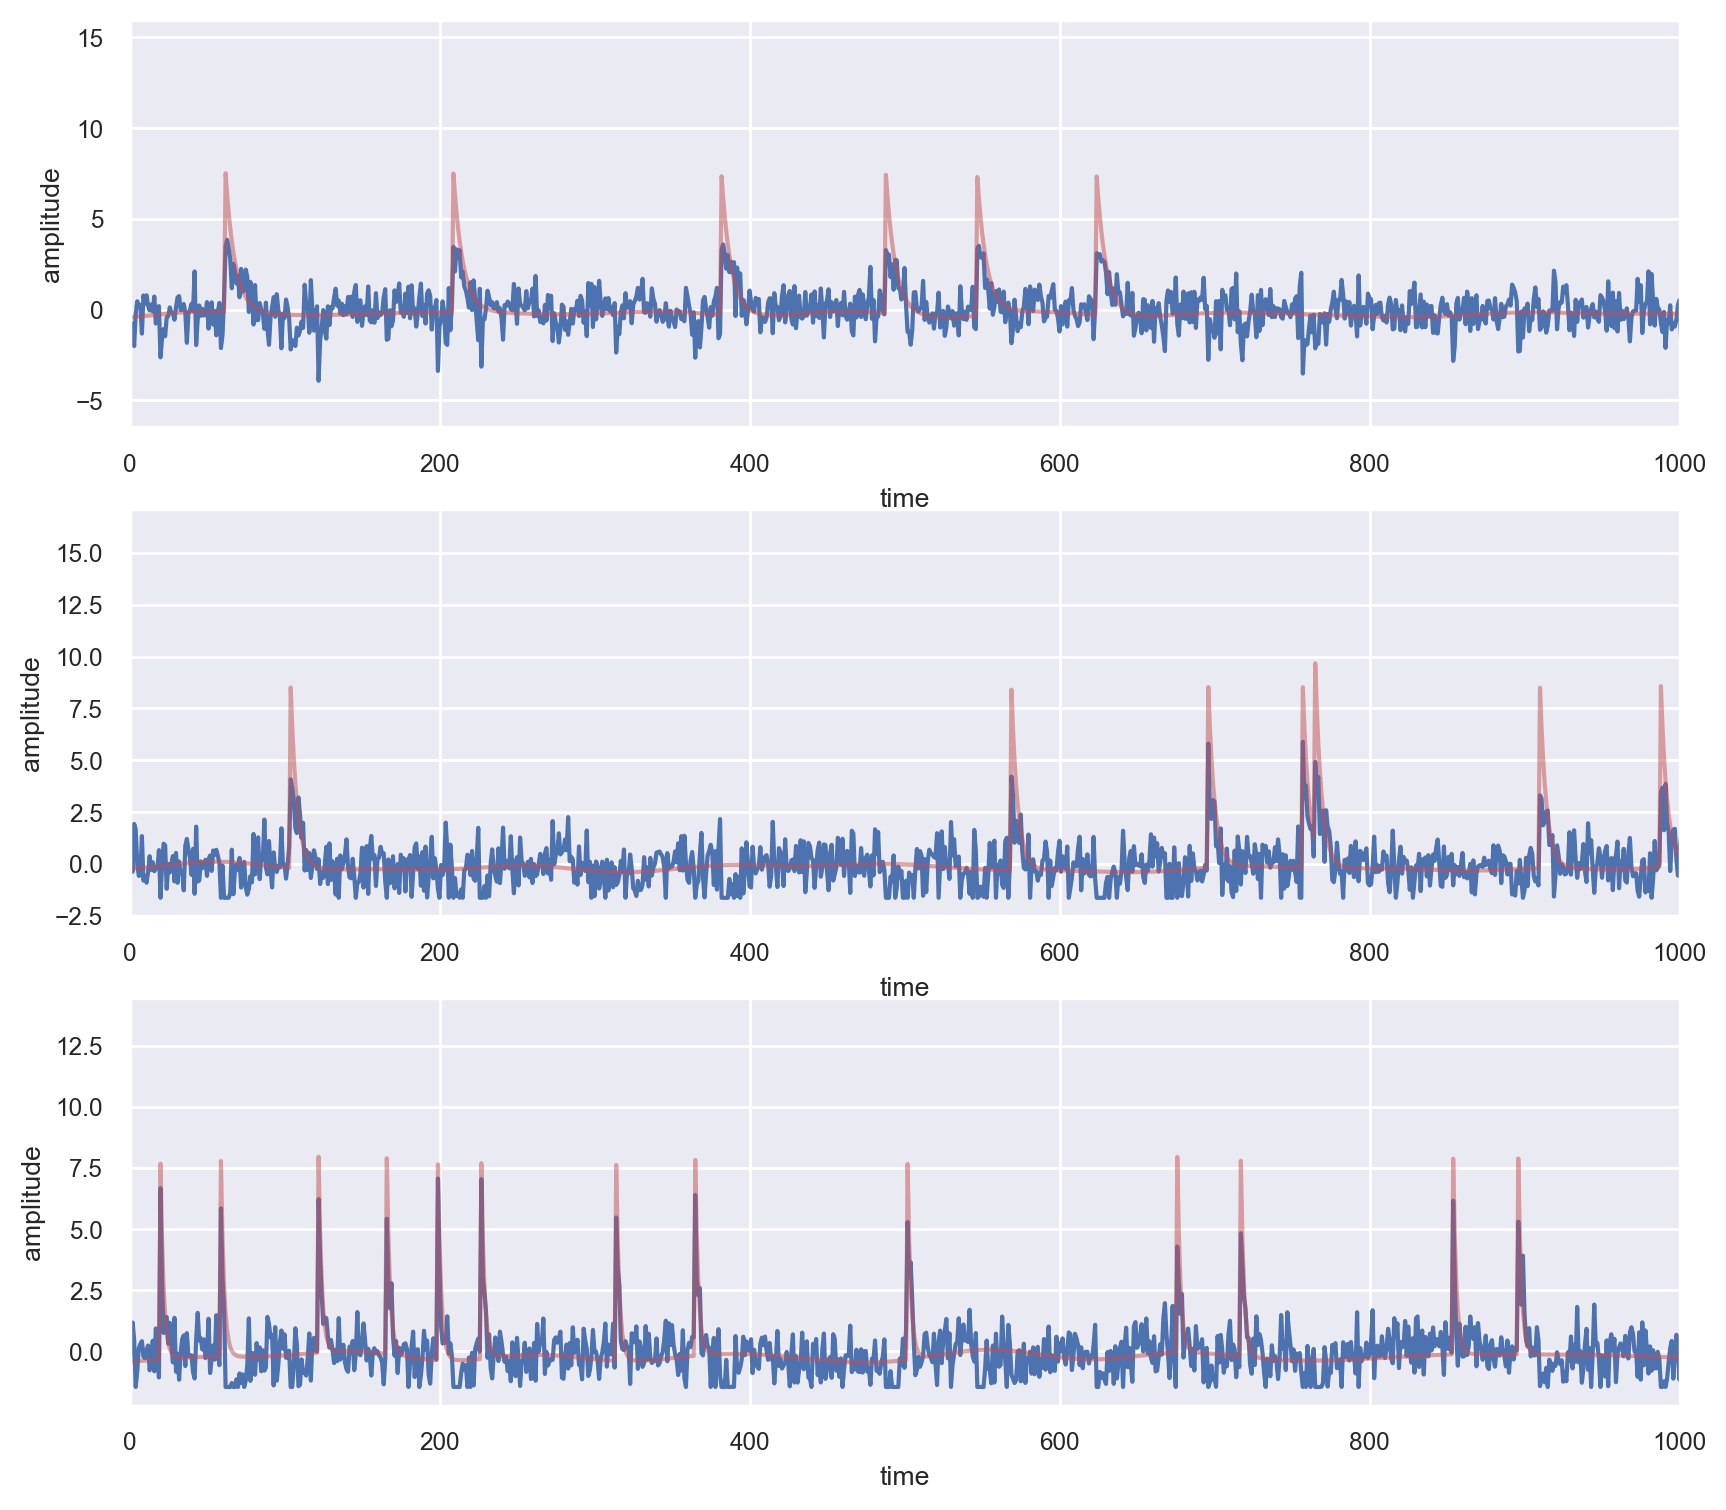

In [5]:
# plot the first 3 components
fig, ax = plt.subplots(3,1, figsize=(10,9))
for i in range(3):
    ax[i].plot(standardize(H[i,:]),'b')
    ax[i].plot(standardize(A[:,i]),alpha = 0.5,c='r')
    ax[i].set(xlabel='time', ylabel='amplitude', xlim=(0, 1000))